<a href="https://colab.research.google.com/github/Takashi-Tokyo/oizumi_datascience/blob/master/L1L2Norm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

sns.set(style="whitegrid", palette="muted", color_codes=True) #

In [ ]:
def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))
    
    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

# L1距離とは

マンハッタン距離ともいう。


In [ ]:
def LP(x, y, lp=1):
    x = np.abs(x) 
    y = np.abs(y)
    return (x**lp + y**lp)**(1./lp)

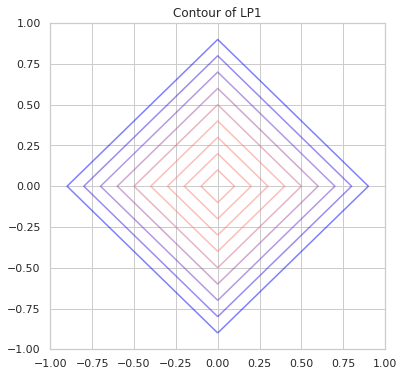

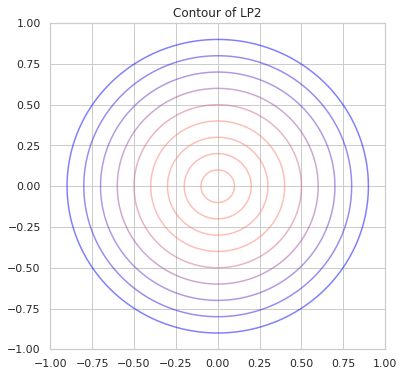

In [ ]:
for lp in range(2):
    fig =plt.figure(figsize=(6,6))
    draw_lp_contour(LP, lp+1, (-1, 1),(-1, 1))

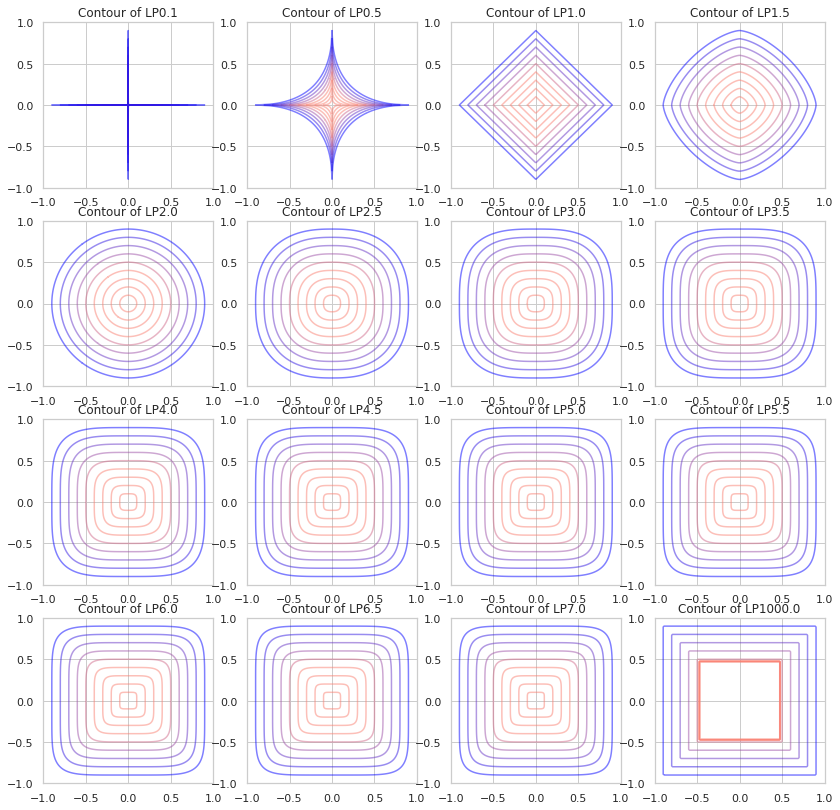

In [ ]:

fig =plt.figure(figsize=(14,14))
size = 4
for i, lp in enumerate(np.r_[[0.1], np.linspace(0.5, 7, 14), [1000]]):
    plt.subplot(size, size, i+1)
    draw_lp_contour(LP, lp, (-1, 1),(-1, 1))